In [33]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf

In [34]:
data = pd.read_csv('/kaggle/input/ct-slice-localization/slice_localization_data.csv')
data

,patientId,value0,value1,value2,value3,value4,value5,value6,value7,value8,...,value375,value376,value377,value378,value379,value380,value381,value382,value383,reference
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,-0.250000,-0.25000,...,-0.25,0.980381,0.0,0.000000,0.000000,0.0,0.0,-0.25,-0.25,21.803851
1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,-0.250000,-0.25000,...,-0.25,0.977008,0.0,0.000000,0.000000,0.0,0.0,-0.25,-0.25,21.745726
2,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,-0.250000,-0.25000,...,-0.25,0.977008,0.0,0.000000,0.000000,0.0,0.0,-0.25,-0.25,21.687600
3,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,-0.250000,-0.25000,...,-0.25,0.977008,0.0,0.000000,0.000000,0.0,0.0,-0.25,-0.25,21.629474
4,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,-0.250000,-0.25000,...,-0.25,0.976833,0.0,0.000000,0.000000,0.0,0.0,-0.25,-0.25,21.571348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53495,96,0.591906,0.357764,0.000000,0.000000,0.552321,0.795304,0.946697,0.952227,0.84395,...,0.00,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00,0.00,29.290398
53496,96,0.612313,0.000000,0.000000,0.000000,0.864160,0.820531,0.000000,0.938813,0.94374,...,0.00,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00,0.00,27.945721
53497,96,0.612313,0.000000,0.000000,0.000000,0.864160,0.820531,0.000000,0.938813,0.94374,...,0.00,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00,0.00,27.945721
53498,96,0.634921,0.904555,0.956087,0.980208,0.157664,0.000000,-0.250000,-0.250000,-0.25000,...,-0.25,0.000000,0.0,0.994967,0.806688,0.0,0.0,-0.25,-0.25,14.582997


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53500 entries, 0 to 53499
Columns: 386 entries, patientId to reference
dtypes: float64(385), int64(1)
memory usage: 157.6 MB


In [36]:
def preprocess_inputs(df):
    df = df.copy()
    
    ## Drop the patientId column
    df = df.drop('patientId', axis = 1)
    
    ## Split the df into X and y
    y = df['reference']
    X = df.drop('reference', axis = 1)
    
    ## Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle = True, random_state = 1)
    
    ## Scale X
#     scaler = StandardScaler()
#     scaler.fit(X_train)
#     X_train = pd.DataFrame(scaler.transform(X_train), index = X_train.index, columns = X_train.columns)
#     X_test = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns = X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [37]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)
# X_train

In [38]:
X_train.shape

(37450, 384)

In [39]:
## Model Training

inputs = tf.keras.Input(shape = 384, )
x = tf.keras.layers.Dense(128, activation = 'relu')(inputs)
x = tf.keras.layers.Dense(128, activation = 'relu')(x)
outputs = tf.keras.layers.Dense(1, activation = 'linear')(x)

model = tf.keras.Model(inputs = inputs, outputs = outputs)

model.compile(
    optimizer = 'adam',
    loss = 'mse'
)

history = model.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    batch_size = 32,
    epochs = 100,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor = 'val_loss',
            patience = 5,
            restore_best_weights = True
            
       )
    ]
)

Epoch 1/100
937/937 [==============================] - 3s 3ms/step - loss: 81.8585 - val_loss: 16.2438
Epoch 2/100
937/937 [==============================] - 3s 3ms/step - loss: 11.4680 - val_loss: 8.0832
Epoch 3/100
937/937 [==============================] - 3s 3ms/step - loss: 6.2795 - val_loss: 5.3385
Epoch 4/100
937/937 [==============================] - 3s 3ms/step - loss: 4.2870 - val_loss: 4.3300
Epoch 5/100
937/937 [==============================] - 3s 3ms/step - loss: 3.1571 - val_loss: 3.5883
Epoch 6/100
937/937 [==============================] - 3s 3ms/step - loss: 2.6021 - val_loss: 2.7804
Epoch 7/100
937/937 [==============================] - 3s 3ms/step - loss: 2.0705 - val_loss: 3.5845
Epoch 8/100
937/937 [==============================] - 3s 3ms/step - loss: 1.9808 - val_loss: 2.2213
Epoch 9/100
937/937 [==============================] - 3s 3ms/step - loss: 1.6738 - val_loss: 2.7226
Epoch 10/100
937/937 [==============================] - 3s 3ms/step - loss: 1.5008 - val

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 384)]             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               49280     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 65,921
Trainable params: 65,921
Non-trainable params: 0
_________________________________________________________________
None


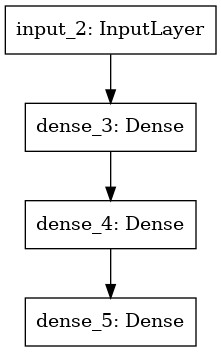

In [49]:
print(model.summary())
tf.keras.utils.plot_model(model)

<AxesSubplot:ylabel='Frequency'>

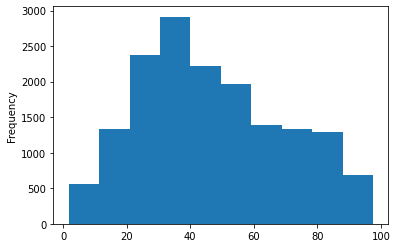

In [50]:
y_test.plot(kind = 'hist')

In [51]:
y_pred = model.predict(X_test)
y_pred

array([[40.916092],
       [26.525854],
       [23.971142],
       ...,
       [26.919008],
       [83.141174],
       [34.149803]], dtype=float32)

In [52]:
y_pred.shape

(16050, 1)

In [43]:
# np.squeeze(y_pred)
y_pred = np.squeeze(model.predict(X_test))
y_pred

array([40.916092, 26.525854, 23.971142, ..., 26.919008, 83.141174,
       34.149803], dtype=float32)

In [44]:
y_pred.shape

(16050,)

In [45]:
y_test - y_pred

34048   -0.111479
45320    0.099218
48401    0.667986
3349    -0.317917
85       0.099718
           ...   
33834   -0.319438
49569    0.030781
40952    0.562478
5714     0.787897
28992    0.667343
Name: reference, Length: 16050, dtype: float64

In [46]:
## Root mean square error

In [47]:
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
print("RMSE: {:.5f}".format(rmse))

RMSE: 0.82260


In [48]:
r_Square = 1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test - y_test.mean())**2))